In [16]:
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
import nltk

In [18]:
df=pd.read_csv('amazon_tweets.csv')

In [19]:
df

,Unnamed: 0,tweet_id,text
0,0,1.271390e+18,RT @HardwareBBQ: .@Asus @ASUSIndia incentivisi...
1,1,1.271390e+18,RT @PaulFalk6: EARTHBOUND (Jim Stone Trilogy B...
2,2,1.271390e+18,Check out HP 245 7GZ75PA#ACJ 14-inch Laptop (A...
3,3,1.271390e+18,RT @Rajkj_7: @amazon @AmazonHelp @amazonIN @Je...
4,4,1.271390e+18,Check out HP 245 6BF83PA 2018 14-inch Laptop (...
...,...,...,...
35995,35995,1.270000e+18,FatCatMats Giant Cat Litter Mat 4 ft x 3 ft (4...
35996,35996,1.270000e+18,RT @CloudMom: How will you be celebrating Moth...
35997,35997,1.270000e+18,Magento is one of the best multi-channel selli...
35998,35998,1.270000e+18,"@tom_peters But he never claimed human focus, ..."


In [20]:
def remove(txt, pattern):
    r = re.findall(pattern, txt)
    for c in r:
        txt = re.sub(c, '', txt)
    
    return txt
df['text'] = np.vectorize(remove)(df['text'], "@[\w]*")

In [29]:
df

,Unnamed: 0,tweet_id,text
0,0,1.271390e+18,RT : . incentivising 'Rate your Gear' user re...
1,1,1.271390e+18,RT : EARTHBOUND (Jim Stone Trilogy Book 1) by ...
2,2,1.271390e+18,Check out HP 245 7GZ75PA#ACJ 14-inch Laptop (A...
3,3,1.271390e+18,RT : IN Why there is no response from your ...
4,4,1.271390e+18,Check out HP 245 6BF83PA 2018 14-inch Laptop (...
...,...,...,...
35995,35995,1.270000e+18,FatCatMats Giant Cat Litter Mat 4 ft x 3 ft (4...
35996,35996,1.270000e+18,RT : How will you be celebrating Motherâ€™s Da...
35997,35997,1.270000e+18,Magento is one of the best multi-channel selli...
35998,35998,1.270000e+18,"But he never claimed human focus, only custom..."


In [ ]:
for i in range(0, 36000):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', df['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    df['tweets'].iloc[i] = tweet

In [34]:
corpus_words = []
for i in range(0,36000):
    tweet = df['text'].iloc[i]
    tweet = nltk.word_tokenize(tweet)
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus_words.append(tweet)

In [31]:
sto=('http','co','RT')

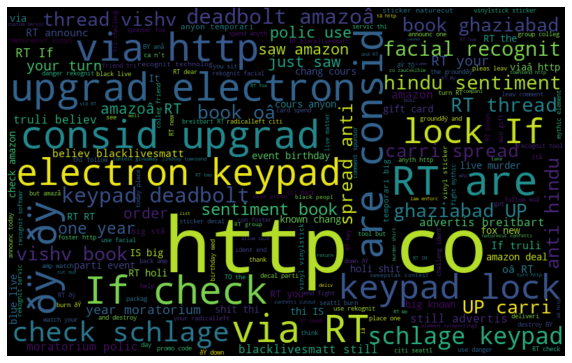

In [35]:
all = ' '.join([i for i in corpus_words])
cloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(all)
plt.figure(figsize=(10, 7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('new.png')
plt.show()

In [36]:
tweets=pd.read_csv('amazon_tweets.csv')

In [37]:
tweets

,Unnamed: 0,tweet_id,text
0,0,1.271390e+18,RT @HardwareBBQ: .@Asus @ASUSIndia incentivisi...
1,1,1.271390e+18,RT @PaulFalk6: EARTHBOUND (Jim Stone Trilogy B...
2,2,1.271390e+18,Check out HP 245 7GZ75PA#ACJ 14-inch Laptop (A...
3,3,1.271390e+18,RT @Rajkj_7: @amazon @AmazonHelp @amazonIN @Je...
4,4,1.271390e+18,Check out HP 245 6BF83PA 2018 14-inch Laptop (...
...,...,...,...
35995,35995,1.270000e+18,FatCatMats Giant Cat Litter Mat 4 ft x 3 ft (4...
35996,35996,1.270000e+18,RT @CloudMom: How will you be celebrating Moth...
35997,35997,1.270000e+18,Magento is one of the best multi-channel selli...
35998,35998,1.270000e+18,"@tom_peters But he never claimed human focus, ..."


In [ ]:
tweet_texts = normalize_texts(tweets['text'])

In [ ]:
tweet_texts = tokenizer.texts_to_sequences(tweet_texts)

In [ ]:
tweet_texts = pad_sequences(tweet_texts, maxlen=MAX_LENGTH)

In [ ]:
tweepred=model.predict(tweet_texts)

In [ ]:
tweets['Sentiment']=tweepred

In [41]:
pos1=0
neg1=0
neutral1=0
for i in range(len(tweepred)):

    if tweepred[i]>0.25 and tweepred[i]<0.85:
        tweepred[i]=0.5
        neutral1=neutral1+1
    elif tweepred[i]<=0.25:
        tweepred[i]=0.0
        neg1=neg1+1
    elif tweepred[i]>=0.85:
        tweepred[i]=1.0
        pos1=pos1+1
print(neg1)
print(pos1)
print(neutral1)

4719
3201
28080


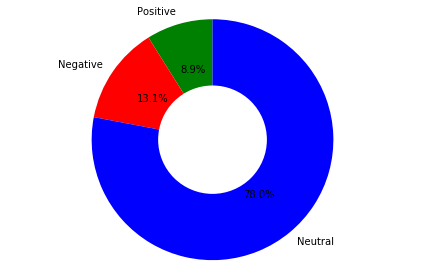

In [44]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [3201*100/36000, 4719*100/36000, 28080*100/36000]
#colors
colors = ['green','red','blue']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig('pie.png')
plt.show()